In [41]:
# WEB SCRAPING

import requests
from bs4 import BeautifulSoup
r = requests.get('https://www.fatsecret.com/calories-nutrition/food/soup')
c = r.content
soup = BeautifulSoup(c, "lxml")
main_content = soup.find('div', attrs = {'class': 'leftCellContent'})
content = main_content.find('tbody').text
linelist = content.splitlines()
print(linelist)

        



['', '', '', 'Vegetable Soups (1 cup serving)', '', '', '', ' Barley Soup', '0.76', '17.91', '4.78', '95', '', '', ' Broccoli Soup', '11.90', '17.92', '8.15', '206', '', '', ' Butternut Squash Soup', '2.06', '17.91', '2.22', '90', '', '', ' Cabbage Soup', '3.26', '7.69', '3.92', '71', '', '', ' Chunky Vegetable Soup', '3.70', '19.01', '3.50', '122', '', '', ' French Onion Soup', '16.53', '39.33', '15.91', '369', '', '', ' Hot and Sour Soup', '7.91', '4.95', '15.10', '163', '', '', ' Leek Soup', '2.06', '11.43', '2.11', '71', '', '', ' Lentil Soup', '4.59', '26.61', '10.42', '186', '', '', ' Miso Soup', '3.36', '7.78', '6.02', '84', '', '', ' Mixed Beans Soup', '1.48', '21.63', '8.43', '129', '', '', ' Potato Soup', '3.56', '14.25', '3.73', '105', '', '', ' Pumpkin Soup', '6.11', '10.99', '2.90', '104', '', '', ' Split Pea Soup', '2.92', '26.50', '8.60', '165', '', '', ' Tomato Soup', '2.93', '17.93', '3.05', '102', '', '', ' Vegetable Soup', '1.93', '11.98', '2.12', '72', '', '', ' Veg

In [14]:
soups = []
fats = []
carbs = []
proteins = []
cals = []
groups = []
type_names = []

count = 0
group = ""
for elem in linelist:
    if (elem.find('(1 cup serving)') != -1):
        group = elem[:elem.find(' (1 cup serving)')]
        type_names.append(group)
        print(group)
        count = 0
        continue
    elif (elem == ""):
        count = 0
        continue
    else:
        count = count + 1
        if (count == 1):
            soups.append(elem)
            groups.append(group)
            group_ids.append(group_id)
        elif (count == 2):
            fats.append(float(elem))
        elif (count == 3):
            carbs.append(float(elem))
        elif (count == 4):
            proteins.append(float(elem))
        elif (count == 5):
            cals.append(float(elem))
            count = 0
        
num_soups =len(type_names)

print(num_soups)

Vegetable Soups
Meat Soups
Noodle Soups
Creamed Soups
Bisques
Chowders
Gumbo
Broths
8


In [5]:
import pandas as pd 
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
df = pd.DataFrame(list(zip(groups, soups, fats, carbs, proteins, cals)), 
               columns =['Type', 'Soups', 'Fats', 'Carbohydrates', 'Proteins', 'Calories']) 
df 
df2 = df
df3 = df


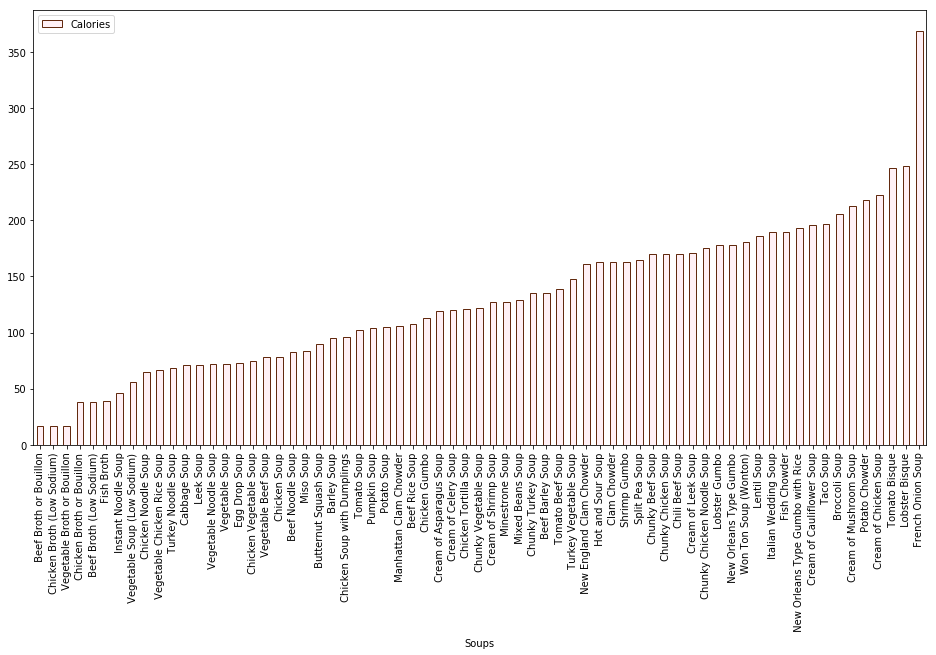

<Figure size 432x288 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt
import numpy as np

df2.sort_values('Calories',inplace=True)
df2.plot(kind='bar',y='Calories',x='Soups', color = '#fff0f5', edgecolor = '#622a0f')

fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.show()
plt.tight_layout()
fig.subplots_adjust(bottom=0.4)
fig.savefig('calories.png', dpi = 100)

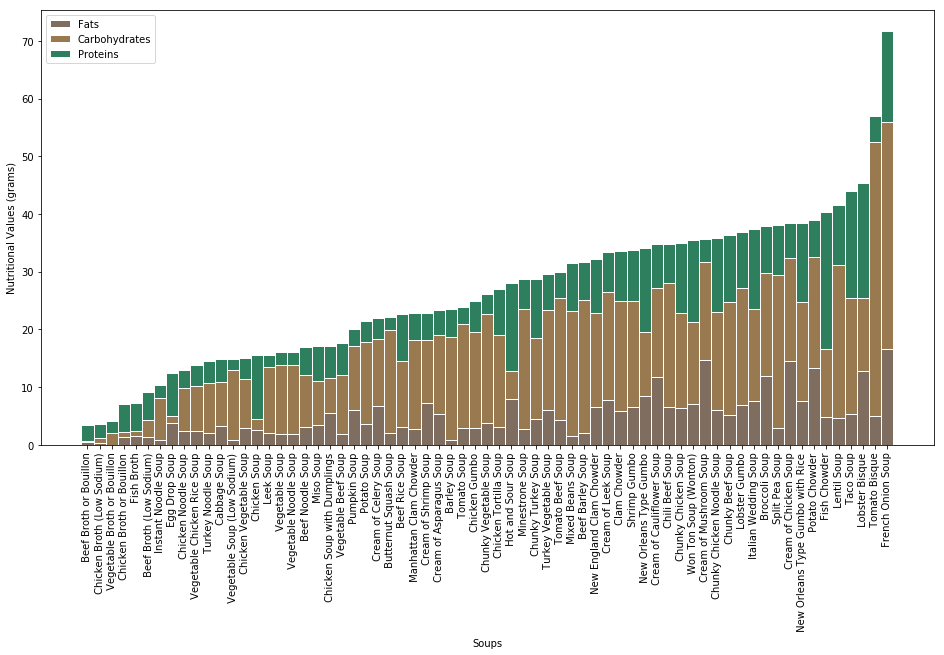

<Figure size 432x288 with 0 Axes>

In [46]:
df3['Total Grams'] = df3['Fats'] + df3['Carbohydrates'] + df3['Proteins']
df3.sort_values(by = ['Total Grams'], inplace = True)


fig = plt.gcf()
fig.set_size_inches(16, 8)
 
# Heights of bars1 + bars2
bars = np.add(df3['Fats'], df3['Carbohydrates']).tolist()
 
# The position of the bars on the x-axis
r = []
for i in range(len(soups)):
    r.append(i)

barWidth = 1
 
# Create brown bars
f = plt.bar(r, df3['Fats'], color='#7f6d5f', edgecolor='white', width=barWidth, label = 'Fats')
# Create tortilla-colored bars (middle), on top of the first ones
c = plt.bar(r, df3['Carbohydrates'], bottom=df3['Fats'], color='#997950', edgecolor='white', width=barWidth, label = 'Carbohydrates')
# Create green bars (top)
p = plt.bar(r, df3['Proteins'], bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth, label = 'Proteins')

# Create legend
plt.legend(handles = [f, c, p])


# Custom X axis
#(str(e) for e in r)
plt.xticks(r, df3['Soups'], rotation = 90)
plt.xlabel("Soups")
plt.ylabel("Nutritional Values (grams)")
 
# Show graphic
plt.show()
plt.tight_layout()
fig.subplots_adjust(bottom=0.4)

# Save plot
fig.savefig('beautifulsoups.png', dpi=100)


In [9]:

f = []
c = []
p = []
totals = []
for i in range(1, num_soups + 1):
    fat_total = 0
    carb_total = 0
    protein_total = 0
    for idx in range(len(soups)):
        if (group_ids[idx] == i):
            fat_total += fats[idx]
            carb_total += carbs[idx]
            protein_total += proteins[idx]
    f.append(fat_total)
    c.append(carb_total)
    p.append(protein_total)
    
totals = [f[i] + c[i] + p[i] for i in range(len(f))]
print(f, '\n', c, '\n', p, '\n', totals)

[75.82000000000004, 76.26, 22.87, 68.14, 17.78, 33.34, 32.23, 5.06] 
 [285.96, 245.28000000000003, 83.2, 105.30000000000001, 60.14, 81.60000000000001, 83.76, 7.82] 
 [102.98, 150.44999999999996, 41.54, 37.089999999999996, 24.53, 53.040000000000006, 52.14, 21.76] 
 [464.76000000000005, 471.99, 147.61, 210.53, 102.45, 167.98000000000002, 168.13, 34.64]


<Figure size 432x288 with 0 Axes>

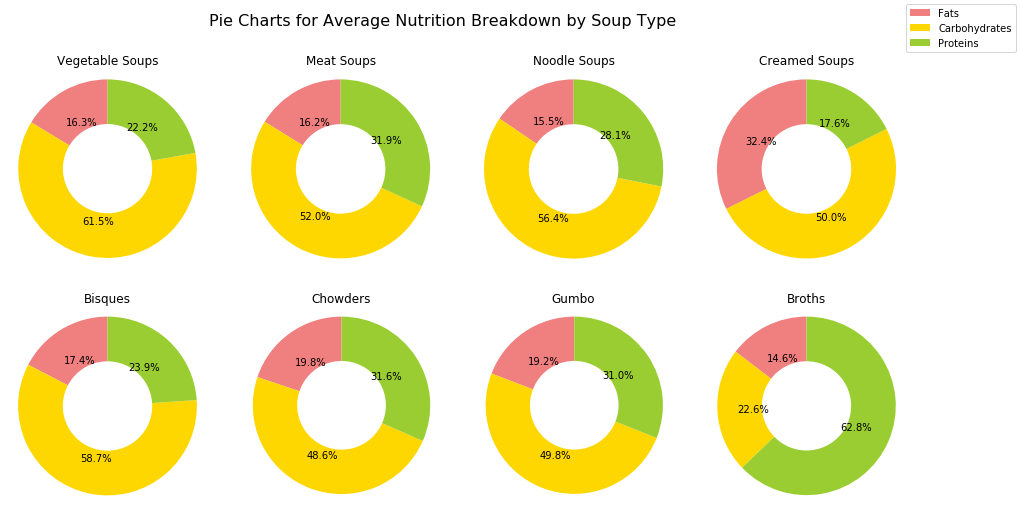

In [39]:
# Data to plot
labels = ['Fats', 'Carbohydrates', 'Proteins']
colors = [ 'lightcoral', 'gold', 'yellowgreen'] #, 'lightskyblue']

fig = plt.gcf()
fig, axes= plt.subplots(2, 4)
fig.set_size_inches(16, 8)


for i, ax in enumerate(axes.flatten()):
    data = [f[i], c[i], p[i]]
    ax.pie(data, colors = colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(type_names[i])
    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
    ax.add_artist(centre_circle)
    ax.axis('equal')  

fig.suptitle('Pie Charts for Average Nutrition Breakdown by Soup Type', fontsize = 16)
fig.legend(labels,loc=1)
plt.show()
fig.savefig('pie charts.png', dpi = 100)

In [59]:
import requests
from bs4 import BeautifulSoup
r = requests.get('https://www.fatsecret.com/calories-nutrition/food/soup/carbohydrate')
c = r.content
soup = BeautifulSoup(c, "lxml")
main_content = soup.find('div', attrs = {'class': 'leftCellContent'})
content = main_content.find('tbody').text
linelist = content.splitlines()
print(linelist)

        

['', '', '', 'Vegetable Soups (1 cup serving)', '', '', '', ' Barley Soup', '14.21', '0.20', '3.7', '17.91', '', '', ' Broccoli Soup', '15.82', '10.31', '2.1', '17.92', '', '', ' Butternut Squash Soup', '15.71', '4.34', '2.2', '17.91', '', '', ' Cabbage Soup', '5.99', '4.04', '1.7', '7.69', '', '', ' Chunky Vegetable Soup', '17.81', '3.94', '1.2', '19.01', '', '', ' French Onion Soup', '36.43', '3.57', '2.9', '39.33', '', '', ' Hot and Sour Soup', '4.75', '1.59', '0.2', '4.95', '', '', ' Leek Soup', '8.43', '1.93', '3.0', '11.43', '', '', ' Lentil Soup', '14.21', '2.38', '12.4', '26.61', '', '', ' Miso Soup', '5.88', '2.59', '1.9', '7.78', '', '', ' Mixed Beans Soup', '15.43', '2.57', '6.2', '21.63', '', '', ' Potato Soup', '13.75', '5.22', '0.5', '14.25', '', '', ' Pumpkin Soup', '8.09', '4.16', '2.9', '10.99', '', '', ' Split Pea Soup', '21.50', '8.15', '5.0', '26.50', '', '', ' Tomato Soup', '16.93', '10.54', '1.0', '17.93', '', '', ' Vegetable Soup', '11.28', '3.83', '0.7', '11.98'

In [60]:
net_carbs = []
sugars = []
fibers = []

count = 0
for elem in linelist:
    if (elem.find('(1 cup serving)') != -1):
        continue
    elif (elem == ""):
        count = 0
        continue
    else:
        print(elem)
        if (elem == "-"):
            elem = 0
        count = count + 1
        if (count == 1):
            continue
        elif (count == 2):
            net_carbs.append(float(elem))
        elif (count == 3):
            sugars.append(float(elem))
        elif (count == 4):
            fibers.append(float(elem))
        elif (count == 5):
            count = 0
        
print(net_carbs, '\n', sugars, '\n', fibers)

 Barley Soup
14.21
0.20
3.7
17.91
 Broccoli Soup
15.82
10.31
2.1
17.92
 Butternut Squash Soup
15.71
4.34
2.2
17.91
 Cabbage Soup
5.99
4.04
1.7
7.69
 Chunky Vegetable Soup
17.81
3.94
1.2
19.01
 French Onion Soup
36.43
3.57
2.9
39.33
 Hot and Sour Soup
4.75
1.59
0.2
4.95
 Leek Soup
8.43
1.93
3.0
11.43
 Lentil Soup
14.21
2.38
12.4
26.61
 Miso Soup
5.88
2.59
1.9
7.78
 Mixed Beans Soup
15.43
2.57
6.2
21.63
 Potato Soup
13.75
5.22
0.5
14.25
 Pumpkin Soup
8.09
4.16
2.9
10.99
 Split Pea Soup
21.50
8.15
5.0
26.50
 Tomato Soup
16.93
10.54
1.0
17.93
 Vegetable Soup
11.28
3.83
0.7
11.98
 Vegetable Soup (Low Sodium)
11.64
4.05
0.5
12.14
 Beef Barley Soup
18.11
1.53
4.9
23.01
 Beef Rice Soup
10.92
0.67
0.5
11.42
 Chicken Soup
1.88
0.88
-
1.88
 Chicken Soup with Dumplings
5.55
0.55
0.5
6.05
 Chicken Tortilla Soup
13.51
2.20
2.5
16.01
 Chicken Vegetable Soup
7.58
1.30
1.0
8.58
 Chili Beef Soup
11.95
7.22
9.5
21.45
 Chunky Beef Soup
18.16
1.94
1.4
19.56
 Chunky Chicken Soup
15.11
2.09
1.4
16.51
 Chunky

In [61]:
import requests
from bs4 import BeautifulSoup
r = requests.get('https://www.fatsecret.com/calories-nutrition/food/soup/fat')
c = r.content
soup = BeautifulSoup(c, "lxml")
main_content = soup.find('div', attrs = {'class': 'leftCellContent'})
content = main_content.find('tbody').text
linelist = content.splitlines()
print(linelist)

['', '', '', 'Vegetable Soups (1 cup serving)', '', '', '', ' Barley Soup', '-', '0.23', '0.15', '0.30', '0.76', '', '', ' Broccoli Soup', '-', '4.75', '2.64', '3.77', '11.90', '', '', ' Butternut Squash Soup', '-', '0.40', '0.12', '1.31', '2.06', '', '', ' Cabbage Soup', '-', '1.41', '0.98', '0.62', '3.26', '', '', ' Chunky Vegetable Soup', '-', '1.58', '1.39', '0.55', '3.70', '', '', ' French Onion Soup', '-', '6.51', '1.37', '7.66', '16.53', '', '', ' Hot and Sour Soup', '-', '3.37', '1.11', '2.69', '7.91', '', '', ' Leek Soup', '-', '0.86', '0.08', '1.02', '2.06', '', '', ' Lentil Soup', '-', '1.47', '2.26', '0.59', '4.59', '', '', ' Miso Soup', '-', '1.09', '1.39', '0.62', '3.36', '', '', ' Mixed Beans Soup', '-', '0.50', '0.33', '0.43', '1.48', '', '', ' Potato Soup', '-', '0.87', '0.47', '1.95', '3.56', '', '', ' Pumpkin Soup', '-', '1.65', '0.25', '3.78', '6.11', '', '', ' Split Pea Soup', '-', '1.00', '0.38', '1.40', '2.92', '', '', ' Tomato Soup', '-', '0.73', '0.99', '0.99',

In [62]:
trans = []
mono = []
poly = []
sat = []

count = 0
for elem in linelist:
    if (elem.find('(1 cup serving)') != -1):
        continue
    elif (elem == ""):
        count = 0
        continue
    else:
        if (elem == "-"):
            elem = 0
        count = count + 1
        if (count == 1):
            continue
        elif (count == 2):
            trans.append(float(elem))
        elif (count == 3):
            mono.append(float(elem))
        elif (count == 4):
            poly.append(float(elem))
        elif (count == 5):
            sat.append(float(elem))
        elif (count == 6):
            count = 0
        
print(trans, '\n', mono,'\n',  poly, '\n', sat)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
 [0.23, 4.75, 0.4, 1.41, 1.58, 6.51, 3.37, 0.86, 1.47, 1.09, 0.5, 0.87, 1.65, 1.0, 0.73, 0.83, 0.08, 0.83, 1.29, 1.18, 2.53, 1.17, 1.28, 2.8, 2.14, 2.83, 1.77, 3.07, 1.59, 1.73, 2.66, 0.8, 1.1, 3.0, 1.24, 1.05, 2.66, 1.52, 0.32, 0.91, 0.8, 0.83, 1.28, 4.71, 1.61, 5.13, 2.75, 2.79, 2.07, 5.16, 1.36, 1.99, 1.59, 0.68, 2.22, 5.71, 2.93, 2.64, 3.07, 2.81, 1.31, 0.22, 0.66, 0.58, 0.11, 0.3, 0.0] 
 [0.15, 2.64, 0.12, 0.98, 1.39, 1.37, 1.11, 0.08, 2.26, 1.39, 0.33, 0.47, 0.25, 0.38, 0.99, 0.72, 0.09, 0.36, 0.16, 0.55, 1.3, 0.67, 0.6, 0.28, 0.22, 1.32, 1.09, 0.52, 0.55, 0.68, 1.35, 0.11, 0.51, 0.98, 0.49, 0.66, 1.51, 0.59, 0.18, 0.26, 0.49, 0.72, 1.91, 2.63, 2.5

In [63]:
import pandas as pd 
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
df = pd.DataFrame(list(zip(groups, soups, trans, mono, poly, sat, fats, net_carbs, sugars, fibers, carbs, proteins, cals)), 
               columns =['Type', 'Soups', 'Trans(g)', 'Mono(g)', 'Poly(g)', 'Saturated(g)', 'Total Fats(g)', 'Net Carbs(g)', 'Sugars(g)', 'Fibers(g)', 'Total Carbs(g)', 'Proteins(g)', 'Calories']) 
df 

Type                              Soups  Trans(g)  Mono(g)  \
0   Vegetable Soups                        Barley Soup      0.00     0.23   
1   Vegetable Soups                      Broccoli Soup      0.00     4.75   
2   Vegetable Soups              Butternut Squash Soup      0.00     0.40   
3   Vegetable Soups                       Cabbage Soup      0.00     1.41   
4   Vegetable Soups              Chunky Vegetable Soup      0.00     1.58   
5   Vegetable Soups                  French Onion Soup      0.00     6.51   
6   Vegetable Soups                  Hot and Sour Soup      0.00     3.37   
7   Vegetable Soups                          Leek Soup      0.00     0.86   
8   Vegetable Soups                        Lentil Soup      0.00     1.47   
9   Vegetable Soups                          Miso Soup      0.00     1.09   
10  Vegetable Soups                   Mixed Beans Soup      0.00     0.50   
11  Vegetable Soups                        Potato Soup      0.00     0.87   
12  Vegetable Soups                       Pumpkin Soup      0.00     1.65   
13  Vegetable Soups                     Split Pea Soup      0.00     1.00   
14  Vegetable Soups                        Tomato Soup      0.00     0.73   
15  Vegetable Soups                     Vegetable Soup      0.00     0.83   
16  Vegetable Soups        Vegetable Soup (Low Sodium)      0.00     0.08   
17       Meat Soups                   Beef Barley Soup      0.00     0.83   
18       Meat Soups                     Beef Rice Soup      0.00     1.29   
19       Meat Soups                       Chicken Soup      0.00     1.18   
20       Meat Soups        Chicken Soup with Dumplings      0.00     2.53   
21       Meat Soups              Chicken Tortilla Soup      0.00     1.17   
22       Meat Soups             Chicken Vegetable Soup      0.00     1.28   
23       Meat Soups                    Chili Beef Soup      0.00     2.80   
24       Meat Soups                   Chunky Beef Soup      0.00     2.14   
25       Meat Soups                Chunky Chicken Soup      0.00     2.83   
26       Meat Soups                 Chunky Turkey Soup      0.00     1.77   
27       Meat Soups               Italian Wedding Soup      0.00     3.07   
28       Meat Soups                          Taco Soup      0.22     1.59   
29       Meat Soups                   Tomato Beef Soup      0.00     1.73   
..              ...                                ...       ...      ...   
37     Noodle Soups                      Egg Drop Soup      0.00     1.52   
38     Noodle Soups                Instant Noodle Soup      0.00     0.32   
39     Noodle Soups                    Minestrone Soup      0.00     0.91   
40     Noodle Soups                 Turkey Noodle Soup      0.00     0.80   
41     Noodle Soups              Vegetable Noodle Soup      0.00     0.83   
42    Creamed Soups            Cream of Asparagus Soup      0.00     1.28   
43    Creamed Soups          Cream of Cauliflower Soup      0.00     4.71   
44    Creamed Soups               Cream of Celery Soup      0.00     1.61   
45    Creamed Soups              Cream of Chicken Soup      0.00     5.13   
46    Creamed Soups                 Cream of Leek Soup      0.00     2.75   
47    Creamed Soups             Cream of Mushroom Soup      0.00     2.79   
48    Creamed Soups               Cream of Shrimp Soup      0.00     2.07   
49          Bisques                     Lobster Bisque      0.00     5.16   
50          Bisques                      Tomato Bisque      0.00     1.36   
51         Chowders                       Clam Chowder      0.00     1.99   
52         Chowders                       Fish Chowder      0.00     1.59   
53         Chowders             Manhattan Clam Chowder      0.00     0.68   
54         Chowders           New England Clam Chowder      0.00     2.22   
55         Chowders                     Potato Chowder      0.00     5.71   
56            Gumbo             New Orleans Type Gumbo      0.00     2.93   
57         

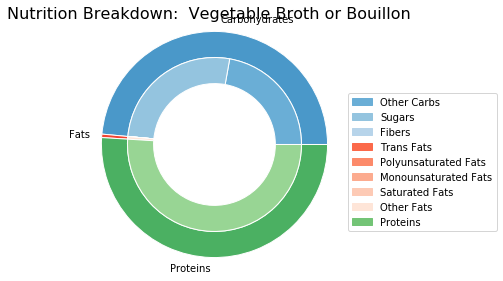

In [264]:
# Data to plot
from IPython.display import clear_output
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import array
import time

other = []
for i in range(len(soups)):
    other.append(fats[i] - (trans[i] + poly[i] + mono[i] + sat[i]))
    

group_names=['Carbohydrates', 'Fats', 'Proteins']
subgroup_names=['Other Carbs', 'Sugars', 'Fibers', 'Trans Fats', 'Polyunsaturated Fats', 'Monounsaturated Fats', 'Saturated Fats', 'Other Fats', 
'Proteins']
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
size = 0.3
colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), b(0.3), b(0.2), b(0.1), c(0.5)]
patches = []
for i in range(len(colors)):
    patches.append(mpatches.Patch(color=colors[i], label=subgroup_names[i]))

fig.subplots_adjust(bottom = 0.4)                   

for i in range(len(soups)):
    fig, ax = plt.subplots()
    ax.axis('equal')
    pie1 = ax.pie(np.array([carbs[i], fats[i], proteins[i]]), radius=1.3, labels = group_names, colors=[a(0.6), b(0.6), c(0.6)],
       wedgeprops=dict(width=size, edgecolor='w'))
    pie2 = ax.pie(np.array([net_carbs[i] - sugars[i], sugars[i], fibers[i], trans[i], poly[i], mono[i], sat[i], other[i], proteins[i]]), radius=1.3-size, 
       wedgeprops=dict(width=size, edgecolor='w'), colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), b(0.3), b(0.2), b(0.1), c(0.4)])
    plt.gcf().suptitle('Nutrition Breakdown: ' + soups[i], fontsize = 16)
    plt.legend(handles = [patch for patch in patches] , loc=(0.9, 0.1))
    plt.show()
    name = soups[i]
    new_name = ""
    for j in range(len(name)):
        if (j == 0):
            continue
        elif (name[j] == " "):
            new_name = new_name + "_"
        else:
            new_name = new_name + name[j]
    fig.savefig(new_name+'.png', dpi=100)
    time.sleep(1)
    clear_output(wait=True)
